#### 심층신경망 => 합성곱신경망  

In [ ]:
# 라이브러리
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as n

In [ ]:
# fashion_mnist 데이터셋 내려받기
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


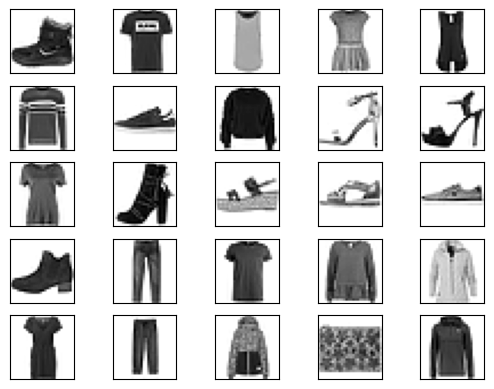

In [ ]:
# 분류에 따라 사용될 클래스
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',   'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

for i in range(25):                       # (100)      개를 보고 싶을때
    plt.subplot(5, 5, i+1)                # (10,10,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
# 심층 신경망을 이용한 모델 생성 및 훈련
x_train, x_test = x_train/255.0, x_test/255.0         # 이미지 테이터를 255로 나눔 , 반드시 해야할 과정

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),      # 합성곱층(특성맵만들고)-풀링층(차원감소) 거치면서 특징만 추출,  그 후 완전연결층에 전달할 때 1차원으로 변경(Flatten)
  tf.keras.layers.Dense(128, activation='relu'),      # 차원이 감소된 특성맵은 밀집층(dense layer)의 입력으로 사용되고, 결과가 출력층으로 연결됨. 이미지의 공간정보 유지됨, #???????? 왜 128인가???????????
  tf.keras.layers.Dropout(0.2),                       # 20% 노드들을 랜덤으로 0으로 드롭아웃 # overfitting 방지를 위한 방법
  tf.keras.layers.Dense(10, activation='softmax')     # 출력결과가 10가지 이므로
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7594 - loss: 0.6822
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8558 - loss: 0.4030
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8666 - loss: 0.3642
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8710 - loss: 0.3506
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8793 - loss: 0.3284
313/313 - 1s - 2ms/step - accuracy: 0.8710 - loss: 0.3527


[0.35272571444511414, 0.8709999918937683]

## 합성곱 신경망

In [ ]:
# 데이터 전처리
X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.       # 0-255 픽셀값을 0-1 범위로 전처리
X_test_final = x_test.reshape((-1, 28, 28, 1)) / 255.

In [ ]:
# 합성곱 네트워크를 이용한 모델 생성
# 신경망은 Conv, MaxPooling  쌍으로 구성
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),   #??? 첫파라미터 왜 32 ???, 두번째 파라미터: 필터(3,3), 패팅(same): 이미지 크기유지(경계 0), 28*28*1 (흑백)
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,  activation='softmax')
])

model_with_conv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 모델 훈련 / 평가
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final,  y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.5574 - loss: 1.1853
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.7853 - loss: 0.5750
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.8207 - loss: 0.4882
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.8415 - loss: 0.4396
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.8552 - loss: 0.4029
313/313 - 4s - 12ms/step - accuracy: 0.8509 - loss: 0.4258


[0.4257658123970032, 0.8508999943733215]

###################################################
## NOTE  ; 이미지 데이터를 255로 나누는 이유

In [ ]:
#########################################################
# !pip install scikit_image

import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [ ]:
def print_image_summary(image, labels):

    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')

    if len(labels) == 1:
        image = image[..., np.newaxis]

    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

In [ ]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # 데이터 불러오기

image_gs = imread('bird.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off');

In [ ]:
print_image_summary(image_gs, ['G'])
# </노트>

--------------
Image Details:
--------------
Image dimensions: (703, 454)
Channels:
G : min=0.0000, max=1.0000
